In [2]:
import os
import numpy as np
import h5py
#from PIL import Image
from tensorflow import python_io
from skimage import io, transform

from dask_generator import datagen

/home/liyi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### read images from dataset

In [3]:
train_path = [
    './camera/2016-01-30--11-24-51.h5',
    './camera/2016-01-31--19-19-25.h5',
    './camera/2016-02-02--10-16-58.h5',
    './camera/2016-02-08--14-56-28.h5',
    './camera/2016-02-11--21-32-47.h5',
    './camera/2016-03-29--10-50-20.h5',
    './camera/2016-04-21--14-48-08.h5',
]

datapath = train_path
time_length = 30
pack_size = 256   # 每个tfrecords文件中有256个视频序列
gen = datagen(datapath, time_len=time_length, batch_size=pack_size, ignore_goods=False)

re_width = 80
re_height = 40
re_shape = [re_height, re_width]

x 52722 | t 263583 | f 52722
x 19731 | t 98719 | f 19731
x 56166 | t 280785 | f 56166
x 25865 | t 129344 | f 25865
x 85296 | t 426596 | f 85296
x 78463 | t 392182 | f 78463
x 30538 | t 152650 | f 30538
training on 331150/348781 examples
5477.39 ms
X (256, 30, 3, 160, 320)
angle (256, 30, 1)
speed (256, 30, 1)


In [22]:
data = next(gen)

4952.93 ms


### resize images with PIL
not convenient compared with skimage

In [3]:
image = np.transpose(data[0],(0,1,3,4,2))
im = Image.fromarray(image[0][0])
re_width = 80
re_height = 40
re_shape = [re_width, re_height]
im_resize = im.resize(re_shape)
im_resize.show()

NameError: name 'Image' is not defined

### resize images with skimage

/home/liyi/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/liyi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


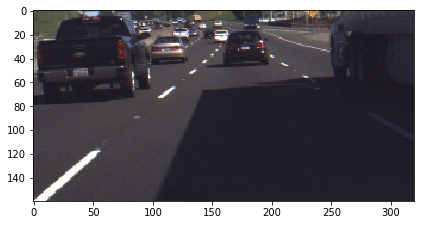

In [23]:
image = np.transpose(data[0],(0,1,3,4,2))
io.imshow(image[0][0])

/home/liyi/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/liyi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


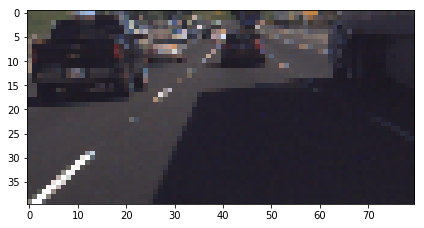

In [24]:
img = transform.rescale(image[0][0],0.25,mode='constant')
io.imshow(img)

In [25]:
print(img.shape)

(40, 80, 3)


/home/liyi/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/liyi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


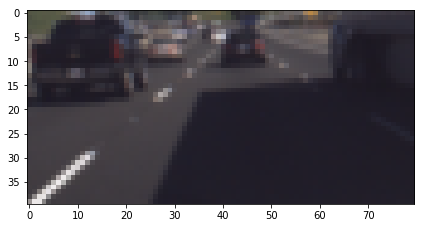

In [26]:
pyramid = tuple(transform.pyramid_gaussian(image[0][0], downscale=2))
io.imshow(pyramid[2])

In [17]:
pyramid2 = tuple(transform.pyramid_gaussian(pyramid[2], upscale=2))
io.imshow(pyramid2[0])

TypeError: pyramid_gaussian() got an unexpected keyword argument 'upscale'

# create datasets
read img from `.h5` files and transform them to `.tfrecord` files

In [5]:
train_path = [
    './camera/2016-01-30--11-24-51.h5',
    './camera/2016-01-31--19-19-25.h5',
    './camera/2016-02-02--10-16-58.h5',
    './camera/2016-02-08--14-56-28.h5',
    './camera/2016-02-11--21-32-47.h5',
    './camera/2016-03-29--10-50-20.h5',
    './camera/2016-04-21--14-48-08.h5',
]

# 2 for validation
validation_path = [
    './camera/2016-06-02--21-39-29.h5',
    './camera/2016-06-08--11-46-01.h5'
]

# 2 for test
test_path = [
    './camera/2016-01-30--13-46-00.h5',
    './camera/2016-05-12--22-20-00.h5',
]

datapath = train_path
time_length = 30
pack_size = 256   # 每个tfrecords文件中有256个视频序列
gen = datagen(datapath, time_len=time_length, batch_size=pack_size, ignore_goods=False)

In [ ]:
count = 0

while count*30<dataset_num:#dataset_num :
    try :
        data = next(gen)  # 取出256*30张图片
        starts = count
        ends = starts + pack_size - 1
        count = count + pack_size
        tfrecords_filename = '../video_prediction/data/comma/train/traj_%d_to_%d.tfrecords'%(starts, ends)
        writer = tf.python_io.TFRecordWriter(tfrecords_filename) # 创建.tfrecord文件，准备写入
            
        for i in range(pack_size):
            #data = next(gen)
            img = np.transpose(data[0][i],(0,2,3,1))
            angle = data[1][i]
            speed = data[2][i]
            img_raw = []
            for k in range(img.shape[0]):
                img_raw.append(img[k].tostring())
                
            example = tf.train.Example(features=tf.train.Features(
                    feature={
                        '0/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[0]])),
                        '0/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[0]])),
                        '0/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[0]])),
                        '1/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[1]])),
                        '1/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[1]])),
                        '1/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[1]])),
                        '2/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[2]])),
                        '2/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[2]])),
                        '2/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[2]])),
                        '3/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[3]])),
                        '3/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[3]])),
                        '3/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[3]])),
                        '4/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[4]])),
                        '4/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[4]])),
                        '4/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[4]])),
                        '5/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[5]])),
                        '5/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[5]])),
                        '5/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[5]])),
                        '6/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[6]])),
                        '6/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[6]])),
                        '6/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[6]])),
                        '7/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[7]])),
                        '7/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[7]])),
                        '7/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[7]])),
                        '8/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[8]])),
                        '8/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[8]])),
                        '8/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[8]])),
                        '9/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[9]])),
                        '9/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[9]])),
                        '9/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[9]])),
                        '10/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[10]])),
                        '10/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[10]])),
                        '10/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[10]])),
                        '11/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[11]])),
                        '11/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[11]])),
                        '11/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[11]])),
                        '12/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[12]])),
                        '12/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[12]])),
                        '12/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[12]])),
                        '13/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[13]])),
                        '13/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[13]])),
                        '13/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[13]])),
                        '14/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[14]])),
                        '14/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[14]])),
                        '14/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[14]])),
                        '15/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[15]])),
                        '15/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[15]])),
                        '15/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[15]])),
                        '16/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[16]])),
                        '16/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[16]])),
                        '16/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[16]])),
                        '17/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[17]])),
                        '17/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[17]])),
                        '17/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[17]])),
                        '18/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[18]])),
                        '18/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[18]])),
                        '18/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[18]])),
                        '19/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[19]])),
                        '19/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[19]])),
                        '19/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[19]])),
                        '20/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[20]])),
                        '20/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[20]])),
                        '20/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[20]])),
                        '21/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[21]])),
                        '21/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[21]])),
                        '21/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[21]])),
                        '22/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[22]])),
                        '22/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[22]])),
                        '22/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[22]])),
                        '23/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[23]])),
                        '23/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[23]])),
                        '23/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[23]])),
                        '24/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[24]])),
                        '24/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[24]])),
                        '24/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[24]])),
                        '25/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[25]])),
                        '25/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[25]])),
                        '25/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[25]])),
                        '26/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[26]])),
                        '26/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[26]])),
                        '26/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[26]])),
                        '27/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[27]])),
                        '27/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[27]])),
                        '27/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[27]])),
                        '28/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[28]])),
                        '28/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[28]])),
                        '28/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[28]])),
                        '29/angle':tf.train.Feature(float_list = tf.train.FloatList(value=[angle[29]])),
                        '29/speed':tf.train.Feature(float_list = tf.train.FloatList(value=[speed[29]])),
                        '29/iamge_aux1/encoded':tf.train.Feature(bytes_list = tf.train.BytesList(value=[img_raw[29]]))
                    }))
            writer.write(example.SerializeToString()) 
        writer.close()
        print('==================== count = %d / %d\n==================== progress = %2.2f'%(count*30, dataset_num, count*30/dataset_num*100))
        #time.sleep(3)
    except StopIteration :
        writer.close()
        exit()

92.87 ms
 1.14 ms
30.63 ms
33.94 ms
 9.73 ms
22.64 ms
30.59 ms
32.75 ms
31.50 ms
 1.02 ms
 1.74 ms
29.30 ms
29.44 ms
18.45 ms
30.42 ms
30.39 ms
23.33 ms
32.17 ms
 8.24 ms
18.00 ms
17.07 ms
 1.23 ms
37.46 ms
29.64 ms
33.69 ms
16.49 ms
 1.97 ms
10.42 ms
26.95 ms
 1.28 ms
20.12 ms
24.15 ms
25.19 ms
15.55 ms
21.39 ms
33.54 ms
 1.46 ms
30.06 ms
 1.04 ms
24.38 ms
 1.58 ms
 0.96 ms
 1.12 ms
33.43 ms
33.03 ms
14.00 ms
25.04 ms
33.08 ms
 1.36 ms
16.36 ms
30.46 ms
15.80 ms
 6.93 ms
 1.21 ms
26.35 ms
28.96 ms
20.77 ms
 1.37 ms
24.37 ms
32.10 ms
25.07 ms
 1.22 ms
24.75 ms
29.82 ms
16.81 ms
 1.29 ms
 1.05 ms
51.83 ms
29.39 ms
23.25 ms
26.59 ms
12.06 ms
27.51 ms
22.20 ms
29.68 ms
29.07 ms
 1.01 ms
31.18 ms
29.89 ms
 1.18 ms
 1.09 ms
31.21 ms
 1.09 ms
18.45 ms
 1.31 ms
25.72 ms
21.46 ms
16.49 ms
 1.51 ms
 1.30 ms
 1.33 ms
43.39 ms
24.93 ms
75.88 ms
13.19 ms
 1.33 ms
 8.95 ms
21.56 ms
27.14 ms
 1.32 ms
 1.08 ms
27.24 ms
30.06 ms
25.28 ms
15.69 ms
32.62 ms
16.35 ms
22.93 ms
 1.28 ms
17.32 ms
 7.58 ms
2

### see how many sequences exists in a single tfrecords file
**answer**: **`256`**

In [2]:
import tensorflow as tf
cnt = 0
for serialized_example in tf.python_io.tf_record_iterator("../video_prediction/data/bair/train/traj_10174_to_10429.tfrecords"):
    cnt = cnt+1
print(cnt)

256


In [3]:
starts = 0
ends = 5
nm = '../video_prediction/data/comma/train/traj_%d_to_%d.tfrecords'%(starts, ends)
nm

'../video_prediction/data/comma/train/traj_0_to_5.tfrecords'

In [26]:
a = data[0][0]
b = []
for i in range(a.shape[0]):
    b.append(a[i].tostring())
b[29]

b'\xaf\xa9\x8ey\x86\xa0\xab\xa7\xa9\xac\xa4\xa7\xab\xa7\xad\xa5\xad\xa6\xa8\xab\xa6\xa8\xa1\xa8\xab\xa6\xac\xa6\x9e\xa3\x9e\xa0\xa0\xa0\xa5\xa1\xa2\xa2\x99\xa0\xa1\xaa\xa6\xa7\xa1\xaa\xaa\xa7\xac\xb0\xac\xac\xac\xb0\xab\xaa\xa7\xaa\xaf\xb2\xb3\xb6\xb7\xb6\xc0\xbe\xda\xdd\xd7\xda\xd5\xce\xc6\xc6\xc1\xc3\xc3\xc0\xc6\xc3\xbe\xba\xc3\xbd\xc4\xc5\xc0\xc6\xd2\xd0\xe4\xde\xdd\xe8\xf3\xf1\xe6\xe2\xde\xd5\xe5\xea\xf9\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xf9\xef\xdb\xe8\xfb\xf6\xfb\xff\xf7\xea\xea\xfd\xff\xff\xff\xff\xff\xee\xf0\xf3\xfe\xff\xff\xf5\x9c\xe2\xc0\xb3\xf5\xf0\xff\xff\xff\xff\xff\xf0\xe0\xe0\xdb\xe2\xdd\xcf\xd5\xdb\xd1\xca\xc2\x90\x9e\xa0\x9c\xb5\xac\xa3\xa6\xaa\xa5\xa8\xa9\xab\xa6\xa5\x9f\x96\x8a}X^dWX`a_fah_[caYWUUSTKQQPQWKLNNQ?KOLKIIBJHAA789LHEFKCD4>HA@BC8/55+()\'()%%$&(,$$$*/:?@BGA>?:=/+-,(%*\'%&()%(&&,)6698;8;986++,/178765/147/+w\x89\xa5\xa9\xab\xaa\xae\xac\xa7\xa2\xa2\xa4\xa4\xa6\xa4\xa3\xa8\x9d\x9d\xa0\x9a\xaa\xa0\x9c\x9a\xa0\xa0\x9e\x9d\x9d\x9d\x94\x97\

### read and test data format from h5 file

In [ ]:
import os
import numpy as np
import h5py
from PIL import Image

from dask_generator import datagen

In [52]:
f1 = h5py.File('./camera/2016-01-30--11-24-51.h5','r')
f2 = h5py.File('./log/2016-01-30--11-24-51.h5','r')

def printname(name):
    print(name)
    
f1.visit(printname)
print('---------------')
# f2.visit(printname)

X
---------------


In [53]:
print(f1['X'])
type(f1['X'])
f1['X'].dtype
f1['X'].shape

<HDF5 dataset "X": shape (52722, 3, 160, 320), type "|u1">


(52722, 3, 160, 320)

In [54]:
type(f1['X'][1])
f1['X'][1].shape
print(f1['X'][1])

[[[20 22 21 ... 24 22 22]
  [21 23 22 ... 24 23 24]
  [22 21 21 ... 22 24 23]
  ...
  [20 23 23 ... 21 21 22]
  [21 23 21 ... 23 20 22]
  [20 21 21 ... 20 21 21]]

 [[18 20 19 ... 21 20 21]
  [19 18 20 ... 20 19 20]
  [20 19 19 ... 19 19 20]
  ...
  [18 21 19 ... 19 19 20]
  [18 19 19 ... 20 18 19]
  [18 18 19 ... 19 19 19]]

 [[46 43 43 ... 48 51 43]
  [45 43 42 ... 43 45 43]
  [42 49 42 ... 45 41 43]
  ...
  [46 44 42 ... 44 44 42]
  [50 46 61 ... 50 44 41]
  [42 42 41 ... 43 43 44]]]


In [62]:
for idx in range(400,420):
    img = np.transpose(f1['X'][idx],(1,2,0))
    im = Image.fromarray(img)
    im.show()

In [66]:
angle = []
x = f1['X']
steering_angle = f2["steering_angle"][:]
idxs = np.linspace(0, steering_angle.shape[0]-1, x.shape[0]).astype("int")
angle.append(steering_angle[idxs])
goods = np.abs(angle[-1]) <= 200

In [10]:
bin(60000)

'0b1110101001100000'

In [87]:
f1.close()
f2.close()

## exercise read and write h5py file
`test.h5`
- dset1 `[1, 2, 3]`
- grp1
    - dset2 `5`
    - grp3
        - dset3 `'string1'`
- grp2

In [28]:
g.close()
g = h5py.File('test.h5','w')
g1 = g.create_group('/grp1')
g2 = g.create_group('/grp2')
g3 = g.create_group('/grp1/grp3')
d1 = g.create_dataset('/dset1',data=[1,2,3])
d2 = g.create_dataset('/grp1/dset2',data=5)
d3 = g3.create_dataset('dset3',data='string1')
g.attrs['str'] = 'another string'

for name in g:
    print(name)
    
print('-----------')
def printname(name):
    print(name)
    
g.visit(printname)
print('-----------')
print(g.attrs['str'])
g.keys()

print('-----------')
print(g['dset1'].name)
print(g['dset1'].value)
print(g['/grp1/dset2'].name)
print(g['/grp1/dset2'].value)
print(g['/grp1/grp3/dset3'].name)
print(g['/grp1/grp3/dset3'].value)

g.close()

dset1
grp1
grp2
-----------
dset1
grp1
grp1/dset2
grp1/grp3
grp1/grp3/dset3
grp2
-----------
another string
-----------
/dset1
[1 2 3]
/grp1/dset2
5
/grp1/grp3/dset3
string1


In [4]:
import glob
a = glob.glob('*.ipy*')
sorted(a)

['h5py_read.ipynb', 'server.py.ipynb']

In [16]:
import os
dpath = os.getcwd()
print(dpath)
dpath_name = os.path.split(dpath)[0]
print(dpath_name)
dpath_name = os.path.basename(os.path.split(dpath)[0])
print(dpath_name)

/home/liyi/video-pred/comma
/home/liyi/video-pred
video-pred
